## Modeling Sequence 

### 1 - Scale all datasets

### 2 - Create Linear Regression and log score
         - Evaluate Model
### 3 - Model Regularization
        - Create RidgeCV model and find most optimal value for alpha and log score
        - Create LassoCV model and find most optimal value for alpha and log score
            - List all features for which Lasso model made coefficients as zero.
            - Plot a bar chart to show relative size of the coefficients 
        - Create ElasticNetCV model  find most optimal value for alpha and log score
### 4 - Apply final selected model to Test dataset & submit prediction to Kaggle


In [126]:
import numpy as np
import pandas as pd
#import patsy
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [127]:
#import cleaned, transformed and with selected freatures datasets into pandas dataframes.
orig_test = pd.read_csv('../datasets/test.csv')
test = pd.read_csv('../datasets/test_for_mod_p2.csv')
X_train = pd.read_csv('../datasets/x_train_for_mod_p2.csv')
X_test = pd.read_csv('../datasets/x_test_for_mod_p2.csv')
y_train = pd.read_csv('../datasets/y_train_for_mod_p2.csv')
y_test = pd.read_csv('../datasets/y_test_for_mod_p2.csv')

In [128]:
#Dropping SalePrice from df and df_test dataframes  
X_train.drop(['SalePrice'],axis=1,inplace=True)
X_test.drop(['SalePrice'],axis=1,inplace=True)


In [129]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(test.shape)

(1517, 33) (513, 33) (1517, 1) (513, 1)
(879, 33)


In [130]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Heating QC', '1st Flr SF',
       'Gr Liv Area', 'Kitchen Qual', 'Fireplaces', 'Garage Area', 'vintage',
       'new_age', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Foundation_PConc',
       'Foundation_Slab'],
      dtype='object')

## 1 - Scale all data

In [131]:
# Scaling the train, validation and test datasets  
ss1 = StandardScaler()
ss1.fit(X_train)
X_train_scaled = ss1.transform(X_train) 
X_test_scaled = ss1.transform(X_test) 
test_scaled = ss1.transform(test) 

## 2 - Create Linear Regression and log scores

In [132]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_train_scaled)
print(f'R2 of LR model on X_train: {lr.score(X_train_scaled,y_train)}')
print(f'R2 of LR model on X_test: {lr.score(X_test_scaled,y_test)}')
print(f'MSE of LR on X_train data:{metrics.mean_squared_error(y_train, lr.predict(X_train_scaled))}')
print(f'MSE of LR on X_test data:{metrics.mean_squared_error(y_test, lr.predict(X_test_scaled))}')
print(f'RMSE of LR on X_test data:{math.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scaled)))}')

R2 of LR model on X_train: 0.8650324800977542
R2 of LR model on X_test: 0.8242153155867227
MSE of LR on X_train data:705678198.2120236
MSE of LR on X_test data:853500552.301291
RMSE of LR on X_test data:29214.73176842962


###  Model Evaluation

#### Analysing Residuals from LR model

In [133]:
resd = y_train - y_preds
len(resd)

1517

In [134]:
resd.mean()

SalePrice   -2.210126e-11
dtype: float64

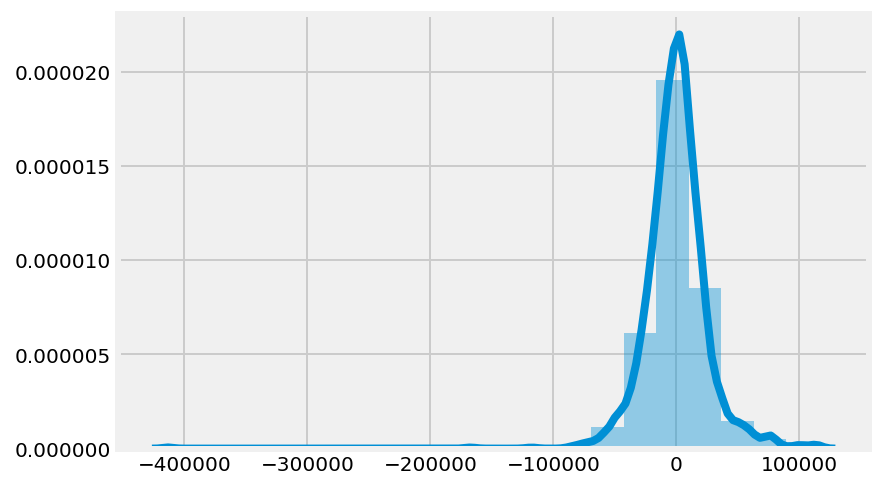

In [135]:
sns.distplot(resd,bins=20);

**Observation : Curve of residuals is very close to normal as expected.**

In [136]:
resd.head()

,SalePrice
0,5763.384858
1,-7415.617406
2,-18616.242721
3,30061.742015
4,-12055.332112


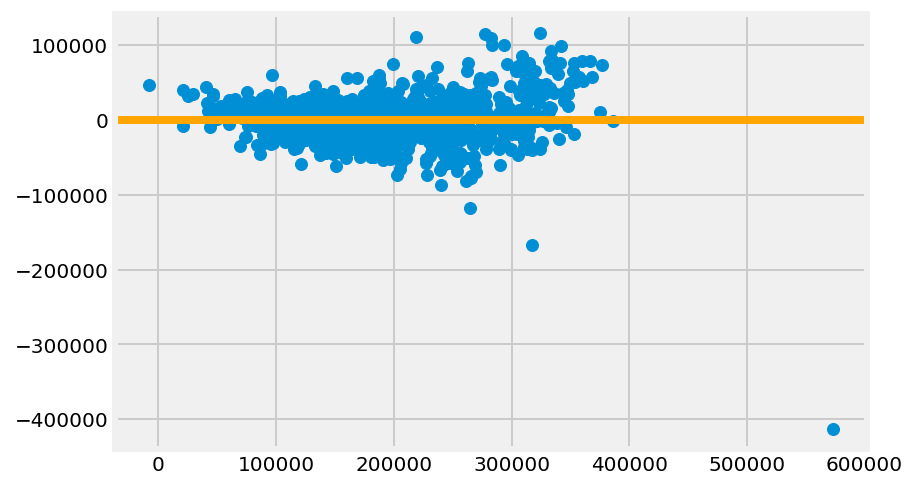

In [137]:
plt.scatter(y_preds, resd['SalePrice']);
plt.axhline(0, color='orange');

**Observation: Residual plot as quite symmetrical as expected.**

### Apply cross_val function with K=5

In [138]:
lrCV_scores = cross_val_score(lr,X_train_scaled,y_train,cv=5).mean()
print (f'Mean of the R2 scores from lr model with CV=5: {lrCV_scores}')

Mean of the R2 scores from lr model with CV=5: 0.8360165043554348


## 4 - Regularization of Model
### 4.1 Ridge CV Model 

In [139]:
#Ridge CV Regression to find optimum alpha value and scores. 
# using logspace range for alpha in the case ridge regressionNote: 
ridgeCV = RidgeCV(alphas=np.logspace(0.1, 10, 100),cv=5)
ridgeCV.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.58489319e+00, 1.99526231e+00, 2.51188643e+00,
       3.16227766e+00, 3.98107171e+00, 5.01187234e+00, 6.30957344e+00,
       7.94328235e+00, 1.00000000e+01, 1.25892541e+01, 1.58489319e+01,
       1.99526231e+01, 2.51188643e+01, 3.16227766e+01, 3.98107171e+01,
       5.01187234e+01, 6.30957344e+01, 7.94328235e+01, 1.00000000e+02,
       1.25892541e+02, 1.58489319e+0...
       1.25892541e+08, 1.58489319e+08, 1.99526231e+08, 2.51188643e+08,
       3.16227766e+08, 3.98107171e+08, 5.01187234e+08, 6.30957344e+08,
       7.94328235e+08, 1.00000000e+09, 1.25892541e+09, 1.58489319e+09,
       1.99526231e+09, 2.51188643e+09, 3.16227766e+09, 3.98107171e+09,
       5.01187234e+09, 6.30957344e+09, 7.94328235e+09, 1.00000000e+10]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [140]:
# A:
print (f'Optimal alpha value suggested by ridgeCV with cv=5: {ridgeCV.alpha_}')
#ridge scoring on trained data
print (f'R2 score from ridgeCV model with CV=5 on X_train_scaled: {ridgeCV.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ridgeCV model with CV=5 on X_test_scaled: {ridgeCV.score(X_test_scaled, y_test)}')
#MSE score for train data using lasso
print (f'MSE from ridgeCV on X_train_scaled: {metrics.mean_squared_error(y_train, ridgeCV.predict(X_train_scaled))}') 
#MSE score for predict data using lasso
print (f'MSE from ridgeCV on X_test_scaled: {metrics.mean_squared_error(y_test, ridgeCV.predict(X_test_scaled))}') 
#RMSE score for predict data using lasso
print (f'RMSE from ridgeCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, ridgeCV.predict(X_test_scaled)))}') 


Optimal alpha value suggested by ridgeCV with cv=5: 316.22776601683825
R2 score from ridgeCV model with CV=5 on X_train_scaled: 0.8619440546416357
R2 score from ridgeCV model with CV=5 on X_test_scaled: 0.8226764514300415
MSE from ridgeCV on X_train_scaled: 721826042.6175838
MSE from ridgeCV on X_test_scaled: 860972314.7704041
RMSE from ridgeCV on X_test_scaled: 29342.32974339979


- **Phase 1 - RMSE for ridgeCV model is 29885 which is slightly better than phase 1 LR model score**
- **Phase 2 - RMSE for ridgeCV model is 29294 which is slightly better than phase 1 ridgeCV model score**

###  LassoCV Model 

In [141]:
# A:
#Lasso Regression 
#lassoCV = lassoCV()
lassoCV = LassoCV(n_alphas=100, cv=5,verbose=0)
lassoCV.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0)

In [142]:
# Display lassoCV's optimal alpha_
print (f'Optimal alpha value suggested by lassoCV with cv=5: {lassoCV.alpha_}')
#R2 score for train data using lasso
print (f'R2 score from lassoCV model with CV=5 on X_train_scaled:{lassoCV.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from lassoCV model with CV=5 on X_test_scaled:{lassoCV.score(X_test_scaled, y_test)}')
#MSE score for train data using lassoCV
print (f'MSE from lassoCV on X_train_scaled: {metrics.mean_squared_error(y_train, lassoCV.predict(X_train_scaled))}')
#MSE score for test data using lasso
print (f'MSE from lassoCV on X_test_scaled:{metrics.mean_squared_error(y_test, lassoCV.predict(X_test_scaled))}')
print (f'RMSE from lassoCV on X_test_scaled:{math.sqrt(metrics.mean_squared_error(y_test, lassoCV.predict(X_test_scaled)))}')

Optimal alpha value suggested by lassoCV with cv=5: 314.43582572854376
R2 score from lassoCV model with CV=5 on X_train_scaled:0.8646319438207355
R2 score from lassoCV model with CV=5 on X_test_scaled:0.8246025349585329
MSE from lassoCV on X_train_scaled: 707772403.6807905
MSE from lassoCV on X_test_scaled:851620457.0654359
RMSE from lassoCV on X_test_scaled:29182.5368510936


- **Phase 1 LassoCV RMSE score of 29699 is only slightly better than phase 1 RidgeCV.**
- **Phase 2 LassoCV RMSE score of 29229 is slightly better than phase 1 LassoCV.**

In [143]:
# Extracting the features with lassoCV.Coef_ value as zero
features_coef = pd.DataFrame(lassoCV.coef_, X_train.columns, columns=['Coeff'])
print(pd.DataFrame(features_coef[abs(features_coef['Coeff']) == 0]))
print('No. of features with zero lassoCV Coef :',len(pd.DataFrame(features_coef[abs(features_coef['Coeff']) == 0])))

Empty DataFrame
Columns: [Coeff]
Index: []
No. of features with zero lassoCV Coef : 0


In [144]:
# list of features with coef not equal to zero. 
selected_feat_coef = pd.DataFrame(features_coef[abs(features_coef['Coeff']) != 0]).sort_values('Coeff')
selected_feat_coef.count()

Coeff    33
dtype: int64

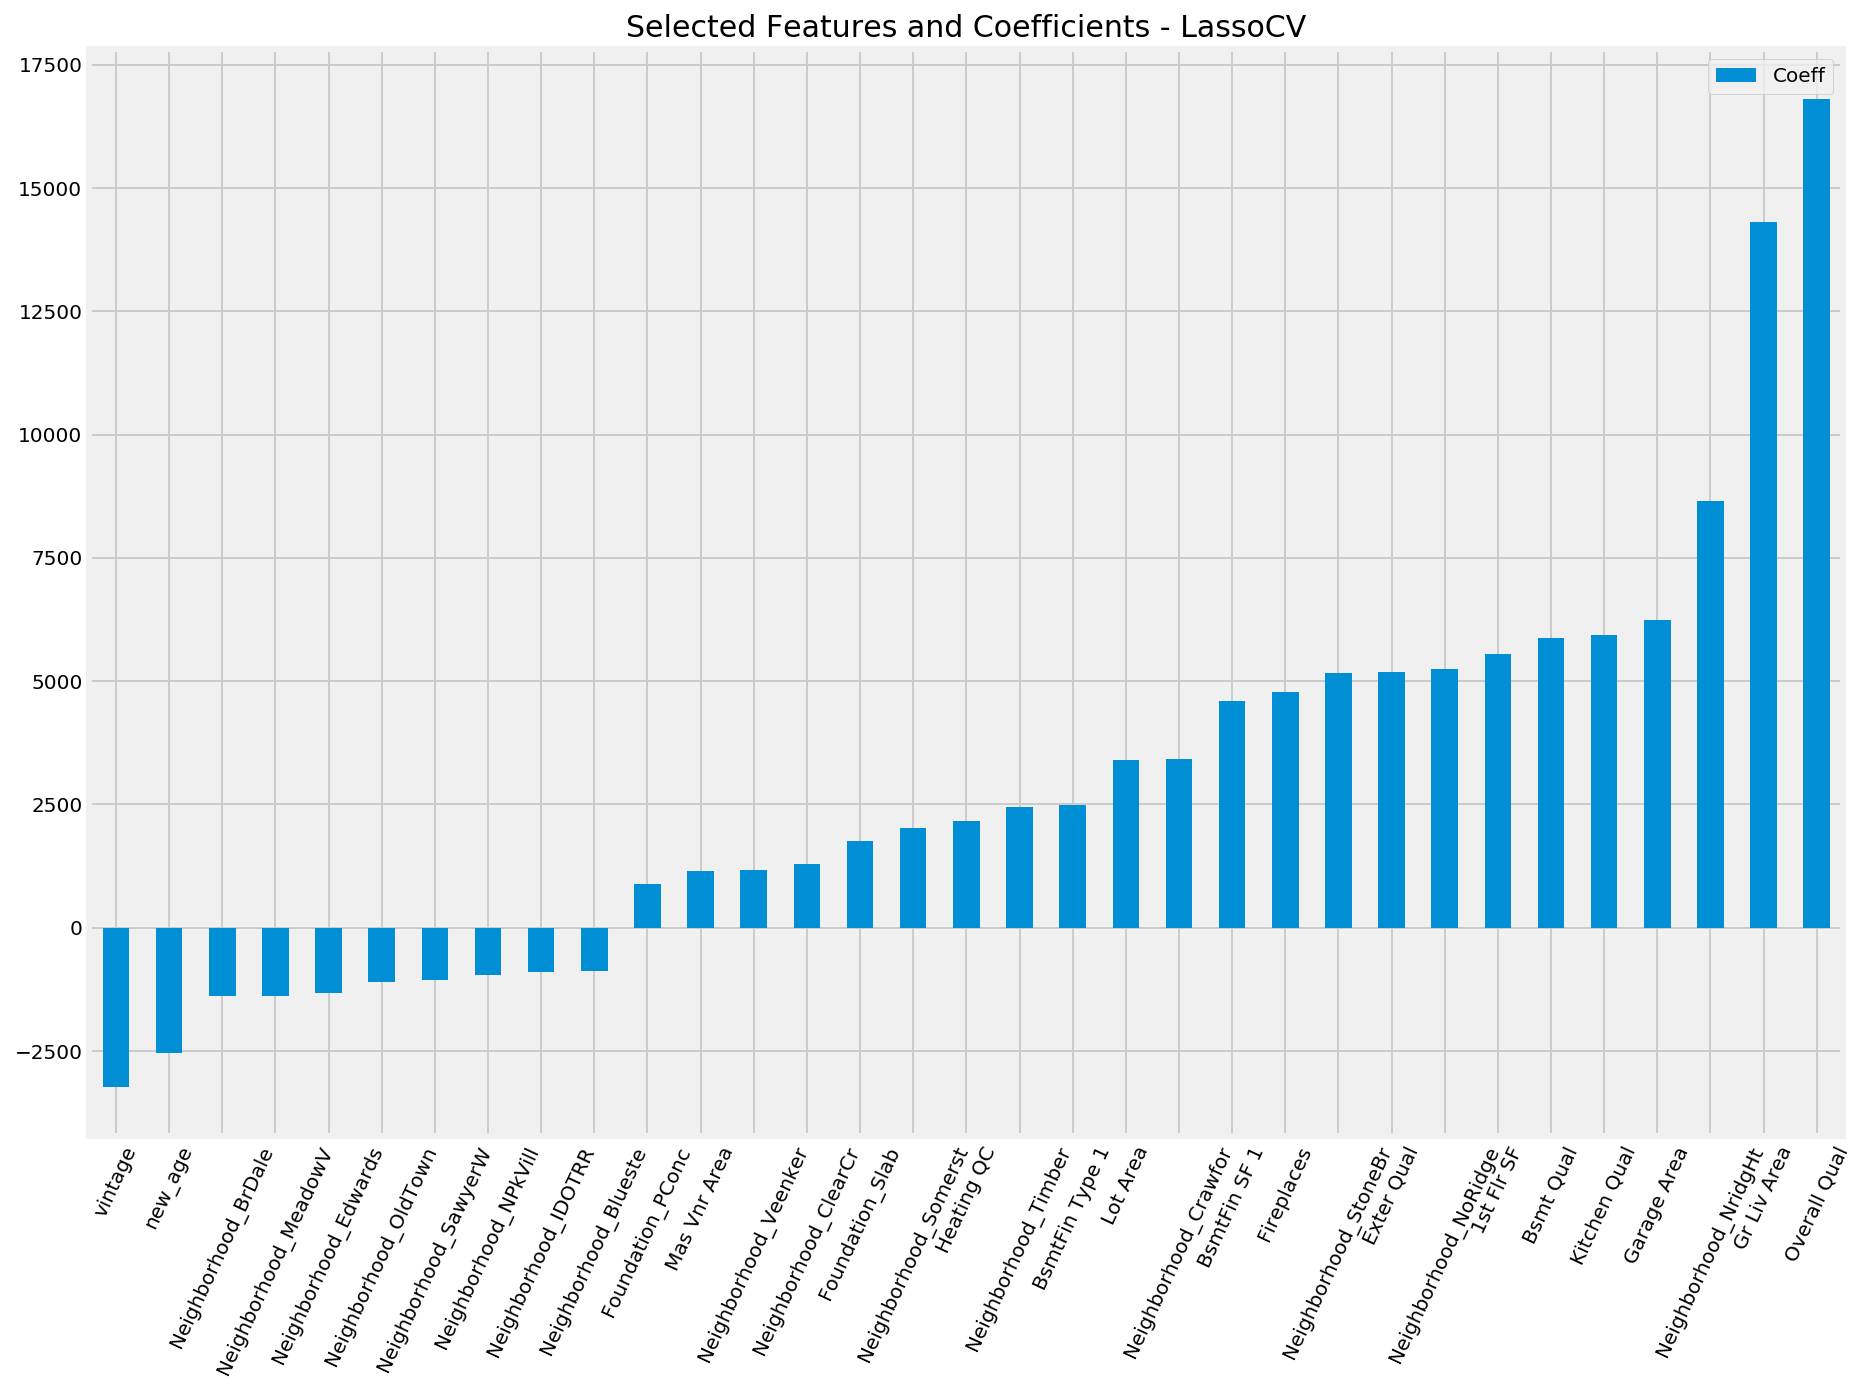

In [145]:
selected_feat_coef.plot(kind='bar',figsize=(14,10));
plt.title('Selected Features and Coefficients - LassoCV',fontsize = 15);
plt.xticks(rotation=65);

### Observations:
- **Phase 2 LassoCV model has computed no features with zero cofficients**

###  ElasticNet CV Model 

In [146]:
#ElasticNet Regression with 50:50 LAsso:Ridge ratio
enet = ElasticNetCV(l1_ratio=0.5, n_alphas=100, cv=5,verbose=1)
enet.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=1)

In [147]:
print (f'Optimal alpha value suggested by ElasticNetCV With cv=5: {enet.alpha_}')
#lasso scoring on trained data
print (f'R2 score from ElasticNet CV model with CV=5 on X_train_scaled: {enet.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ElasticNet CV model with CV=5 on X_test_scaled: {enet.score(X_test_scaled, y_test)}')
#MSE score for train data using enet
print (f'MSE from ElasticNetCV on X_train_scaled: {metrics.mean_squared_error(y_train, enet.predict(X_train_scaled))}')
#MSE score for test data using enet
print (f'MSE from ElasticNetCV on X_test_scaled: {metrics.mean_squared_error(y_test, enet.predict(X_test_scaled))}')
print (f'RMSE from ElasticNetCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, enet.predict(X_test_scaled)))}')


Optimal alpha value suggested by ElasticNetCV With cv=5: 117.8390657243273
R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.16885039104457766
R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.16517617800498519
MSE from ElasticNetCV on X_train_scaled: 4345668935.141566
MSE from ElasticNetCV on X_test_scaled: 4053382668.2639127
RMSE from ElasticNetCV on X_test_scaled: 63666.18151156792


- **Phase 1 - With 50:50 ratio of Lasso and Ridge the RMSE score of ElasticNet model is 61895.**
- **Phase 2 - With 50:50 ratio of Lasso and Ridge the RMSE score is ElasticNet model is 62495.** 

In [148]:
#ElasticNet Regression with 90:10 Lasso:Ridge ratio
enet = ElasticNetCV(l1_ratio=0.9, n_alphas=100, cv=5,verbose=1)
enet.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.9, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=1)

In [149]:
print (f'Optimal alpha value suggested by ElasticNetCV With cv=5: {enet.alpha_}')
#lasso scoring on trained data
print (f'R2 score from ElasticNet CV model with CV=5 on X_train_scaled: {enet.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ElasticNet CV model with CV=5 on X_test_scaled: {enet.score(X_test_scaled, y_test)}')
#MSE score for train data using enet
print (f'MSE from ElasticNetCV on X_train_scaled: {metrics.mean_squared_error(y_train, enet.predict(X_train_scaled))}')
#MSE score for test data using enet
print (f'MSE from ElasticNetCV on X_test_scaled: {metrics.mean_squared_error(y_test, enet.predict(X_test_scaled))}')
print (f'RMSE from ElasticNetCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, enet.predict(X_test_scaled)))}')



Optimal alpha value suggested by ElasticNetCV With cv=5: 65.46614762462629
R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.6406326026678816
R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.6218980696303278
MSE from ElasticNetCV on X_train_scaled: 1878953822.58746
MSE from ElasticNetCV on X_test_scaled: 1835826639.1285489
RMSE from ElasticNetCV on X_test_scaled: 42846.547575371216


- **Phase 1 - With 90:10 ratio of Lasso and Ridge the RMSE score has dropped to 39812, however is still higher than the score from phase 1 LassoCV.**
- **Phase 2 - With 90:10 ratio of Lasso and Ridge the RMSE score has dropped to 43709, which is higher than phase 1 ElasticNet RMSE score with this ratio.** 

## 4 - Applying LassoCv model to Test dataset for final Prediction and Submission

In [160]:
# using LassoCV model for final prediction on the test data  
y_preds =lr.predict(test_scaled)

In [161]:
y_preds.shape

(879, 1)

In [162]:
y_preds.ravel()

array([124132.47131604, 169025.63138983, 209796.19310297, 115933.4220502 ,
       180084.94993864,  78848.24657151,  99360.01417133, 146021.10119769,
       204651.22508228, 167115.27390698, 170636.4794335 , 116009.46513504,
       151906.81934432, 254124.59790692, 152401.86622065, 110991.86714169,
       162837.44099118, 109030.78113639, 189136.28610621, 195803.37727529,
       139914.61027499, 131266.47105255, 194435.70064973, 183833.82889137,
       183066.37440374, 113073.95594884, 137636.29391112, 130455.18443627,
       157622.45006368,  45133.899036  , 109950.99211049,  98458.60399669,
       219638.12183638, 166612.68137277, 218215.20990112, 178712.61426172,
       109049.88303556,  83508.32456683, 129944.38864124, 204547.65084712,
       176290.35920677, 206325.71326309, 152957.87789739, 169572.9994067 ,
       242359.40760668,  87904.26603301, 223704.24144165, 111698.71555342,
       118377.50651242, 119758.44957603, 106681.52547733, 199976.24236974,
       236141.89309568, 1

In [164]:
# Building a dataframe with required format by kaggle and storing it to .csv file for submission to Kaggle.
submission_lr_p2 = pd.DataFrame({
        "Id": orig_test["Id"],
        "SalePrice": y_preds.ravel()})

submission_lr_p2.to_csv('../datasets/submission_lr_p2.csv', index=False)



In [165]:
submission_lr_p2

,Id,SalePrice
0,2658,124132.471316
1,2718,169025.631390
2,2414,209796.193103
3,1989,115933.422050
4,625,180084.949939
...,...,...
874,1662,176199.388401
875,1234,206557.700203
876,1373,136927.368144
877,1672,111416.480803


## Return back to main notebook for 'Project Summary Report'